<a href="https://colab.research.google.com/github/digantkumar/Digant-Kumar/blob/master/Task%201%20-%20Basic%20Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1 - BASIC AUTOENCODER**

### **AUTOENCODER BASE MODEL (GIVEN)**

In [0]:
#################################################################################################
#########                             Base Model                                         ########
#################################################################################################

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Encoder function to learn a compressed data structure
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [0]:
# Decoder function to reconstruct the data from lower dimension to its higher dimension
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [0]:
# Combines both the encoder and decoder and generates the output
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
#x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 9.253989219665527
Epoch 2/100. Loss: 5.934606075286865
Epoch 3/100. Loss: 5.440960884094238
Epoch 4/100. Loss: 5.102649688720703
Epoch 5/100. Loss: 4.941199779510498
Epoch 6/100. Loss: 4.8313093185424805
Epoch 7/100. Loss: 4.776271343231201
Epoch 8/100. Loss: 4.684173583984375
Epoch 9/100. Loss: 4.625481605529785
Epoch 10/100. Loss: 4.581316947937012
Epoch 11/100. Loss: 4.530300140380859
Epoch 12/100. Loss: 4.489694595336914
Epoch 13/100. Loss: 4.4656195640563965
Epoch 14/100. Loss: 4.4591383934021
Epoch 15/100. Loss: 4.44425630569458
Epoch 16/100. Loss: 4.431601524353027
Epoch 17/100. Loss: 4.424561023712158
Epoch 18/100. Loss: 4.39663553237915
Epoch 19/100. Loss: 4.387007713317871
Epoch 20/100. Loss: 4.422090530395508
Epoch 21/100. Loss: 4.387922286987305
Epoch 22/100. Loss: 4.378843784332275
Epoch 23/100. Loss: 4.361762523651123
Epoch 24/100. Loss: 4.3473100662231445
Epoch 25/100. Loss: 4.355829238891602
Epoch 26/100. Loss: 4.343535900115967
Epoch 27/100. Loss: 4.

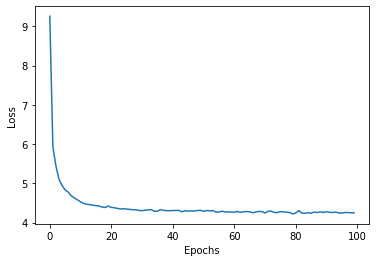

In [9]:
# Figure generates the epochs vs loss graph
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

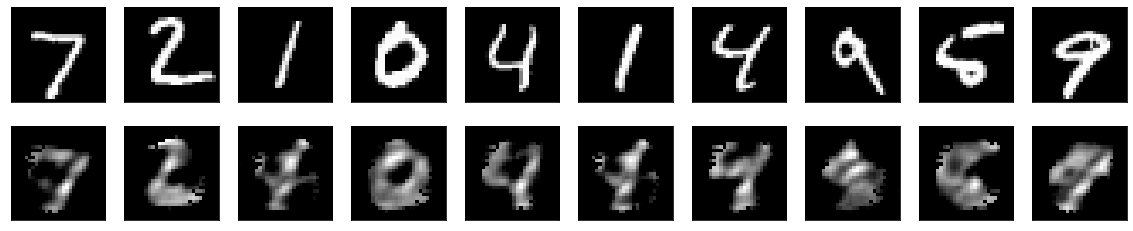

In [10]:
# Generating the predicted images
number = 10  
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **AUTOENCODER BASE MODEL + 1 HIDDEN LAYER**

In [0]:
#################################################################################################
#########               Base Model + 1 hidden layer (dimension change)                   ########
#################################################################################################

# Encoder function to learn a compressed data structure
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.sigmoid)
    
    def call(self, input_features):
        hid_layer_1 = self.hidden_layer_1(input_features)
        activation = self.hidden_layer_2(hid_layer_1)
        return self.output_layer(activation)

In [0]:
# Decoder function to reconstruct the data from lower dimension to its higher dimension
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        activation = self.hidden_layer_1(code)
        return self.output_layer(activation)

In [0]:
# Combines both the encoder and decoder and generates the output
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 14.599205017089844
Epoch 2/100. Loss: 8.505228042602539
Epoch 3/100. Loss: 5.824843406677246
Epoch 4/100. Loss: 4.739099979400635
Epoch 5/100. Loss: 4.1971869468688965
Epoch 6/100. Loss: 3.894381284713745
Epoch 7/100. Loss: 3.6938469409942627
Epoch 8/100. Loss: 3.531859874725342
Epoch 9/100. Loss: 3.407147169113159
Epoch 10/100. Loss: 3.3080549240112305
Epoch 11/100. Loss: 3.2145309448242188
Epoch 12/100. Loss: 3.157881021499634
Epoch 13/100. Loss: 3.0904319286346436
Epoch 14/100. Loss: 3.041408061981201
Epoch 15/100. Loss: 3.0047554969787598
Epoch 16/100. Loss: 2.9878225326538086
Epoch 17/100. Loss: 2.901216745376587
Epoch 18/100. Loss: 2.8417539596557617
Epoch 19/100. Loss: 2.7821099758148193
Epoch 20/100. Loss: 2.7706527709960938
Epoch 21/100. Loss: 2.772881269454956
Epoch 22/100. Loss: 2.7318520545959473
Epoch 23/100. Loss: 2.6846718788146973
Epoch 24/100. Loss: 2.6562395095825195
Epoch 25/100. Loss: 2.684285879135132
Epoch 26/100. Loss: 2.676032781600952
Epoch 2

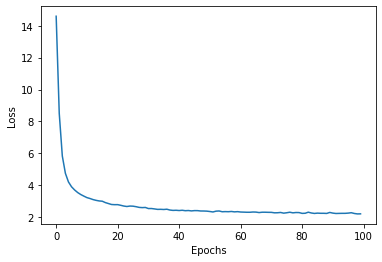

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



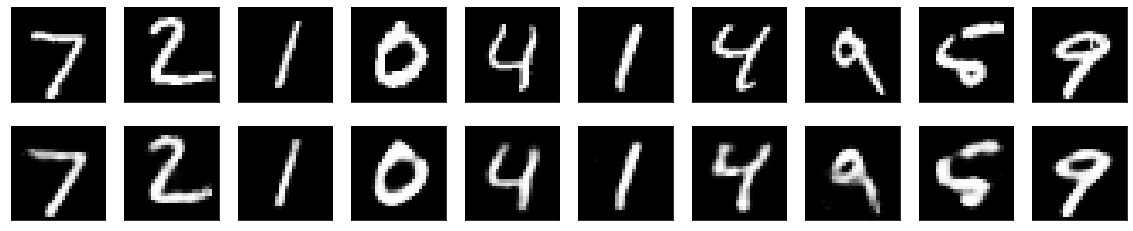

In [0]:
# Generating the predicted images
number = 10  
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**AUTOENCODER BASE MODEL + 2 HIDDEN LAYERS**

In [0]:
#################################################################################################
#########               Base Model + 2 hidden layer (dimension change)                   ########
#################################################################################################

# Encoder function to learn a compressed data structure
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.sigmoid)
    
    def call(self, input_features):
        hid_layer_1 = self.hidden_layer_1(input_features)
        hid_layer_2 = self.hidden_layer_2(hid_layer_1)
        activation = self.hidden_layer_3(hid_layer_2)
        return self.output_layer(activation)

In [0]:
# Decoder function to reconstruct the data from lower dimension to its higher dimension
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        hid_layer_1 = self.hidden_layer_1(code)
        activation = self.hidden_layer_2(hid_layer_1)
        return self.output_layer(activation)

In [0]:
# Combines both the encoder and decoder and generates the output
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 16.538625717163086
Epoch 2/100. Loss: 15.91459846496582
Epoch 3/100. Loss: 15.897239685058594
Epoch 4/100. Loss: 15.879228591918945
Epoch 5/100. Loss: 15.863126754760742
Epoch 6/100. Loss: 15.850329399108887
Epoch 7/100. Loss: 15.848308563232422
Epoch 8/100. Loss: 15.845898628234863
Epoch 9/100. Loss: 15.84383487701416
Epoch 10/100. Loss: 15.84194278717041
Epoch 11/100. Loss: 15.84015941619873
Epoch 12/100. Loss: 15.838465690612793
Epoch 13/100. Loss: 15.836862564086914
Epoch 14/100. Loss: 15.835328102111816
Epoch 15/100. Loss: 15.833861351013184
Epoch 16/100. Loss: 15.832427024841309
Epoch 17/100. Loss: 15.831056594848633
Epoch 18/100. Loss: 15.829717636108398
Epoch 19/100. Loss: 15.828405380249023
Epoch 20/100. Loss: 15.827139854431152
Epoch 21/100. Loss: 15.825888633728027
Epoch 22/100. Loss: 15.824687004089355
Epoch 23/100. Loss: 15.823527336120605
Epoch 24/100. Loss: 15.822416305541992
Epoch 25/100. Loss: 15.821382522583008
Epoch 26/100. Loss: 15.820366859436035

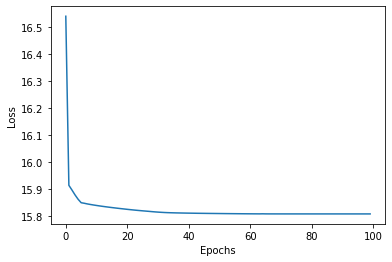

In [0]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



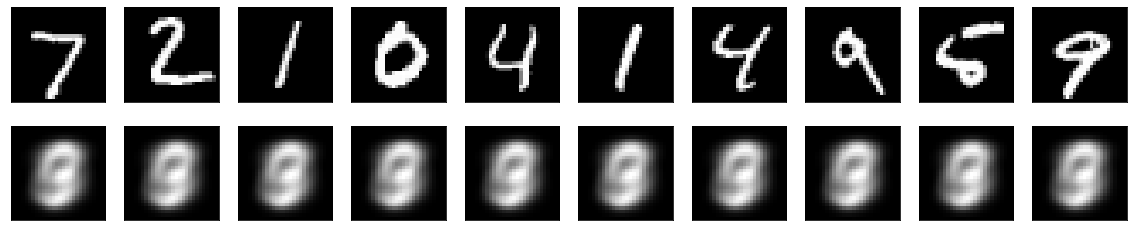

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **CNN BASE MODEL**

In [0]:
#################################################################################################
#########                            CNN Base Model                                      ########
#################################################################################################

# The size of the image
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) 

# The encoder contains 3 convolutional and 3 max pooling layers
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

# The decoder contains 3 convolutional and 3 up sampling layers
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7067 - val_loss: 0.7037
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.7010 - val_loss: 0.6984
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6960 - val_loss: 0.6937
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6916 - val_loss: 0.6894
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6870 - val_loss: 0.6844
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6806 - val_loss: 0.6759
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6668 - val_loss: 0.6542
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6252 - val_loss: 0.5825
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.5180 - val_loss: 0.4769
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4645 - val_lo

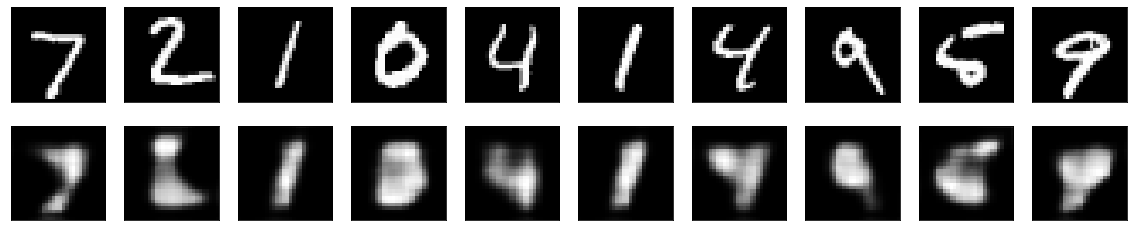

In [0]:
# Generating the predictions from the test set
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **CNN MODEL VARIATIONS**

In [0]:
#################################################################################################
#########                      CNN BASE MODEL Variations                                 ########
#################################################################################################


input_img = tf.keras.layers.Input(shape=(28, 28, 1))

# The encoder contains 4 convolutional and 4 max pooling layers
x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# The decoder contains 4 convolutional and 4 up sampling layers
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='SGD', loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4063 - val_loss: 0.2939
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2750 - val_loss: 0.2664
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2634 - val_loss: 0.2604
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2584 - val_loss: 0.2558
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2539 - val_loss: 0.2514
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2495 - val_loss: 0.2468
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2440 - val_loss: 0.2400
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2358 - val_loss: 0.2317
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2295 - val_loss: 0.2269
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2262 - val_lo

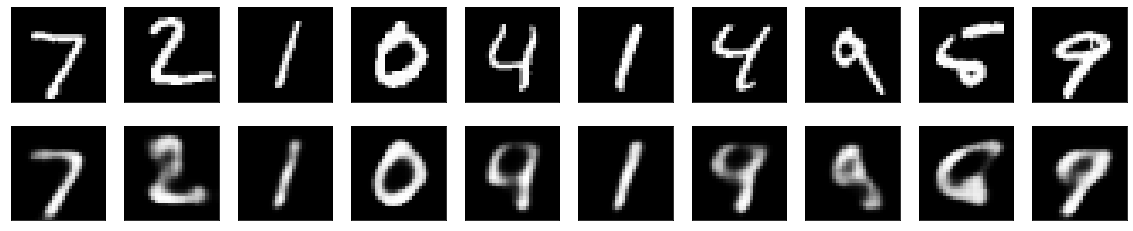

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **CNN MODEL OPTIMIZED**

In [0]:
#################################################################################################
#########                        CNN MODEL OPTIMIZED                                     ########
#################################################################################################

input_img = tf.keras.layers.Input(shape=(28, 28, 1))

# The encoder contains 3 convolutional, 2 max pooling layers, dense layer and batch normalization after every convolutional layer 
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# The decoder contains 3 convolutional, 2 up sampling layers, dense layer and batch normalization after every convolutional layer 
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding = 'same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
optimizer = tf.keras.optimizers.Adam(lr=0.001)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1175 - val_loss: 0.0855
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0779 - val_loss: 0.0802
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0740 - val_loss: 0.0750
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0721 - val_loss: 0.0733
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0710 - val_loss: 0.0699
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0702 - val_loss: 0.0691
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0696 - val_loss: 0.0685
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0692 - val_loss: 0.0691
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0687 - val_loss: 0.0679
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0685 - val_l

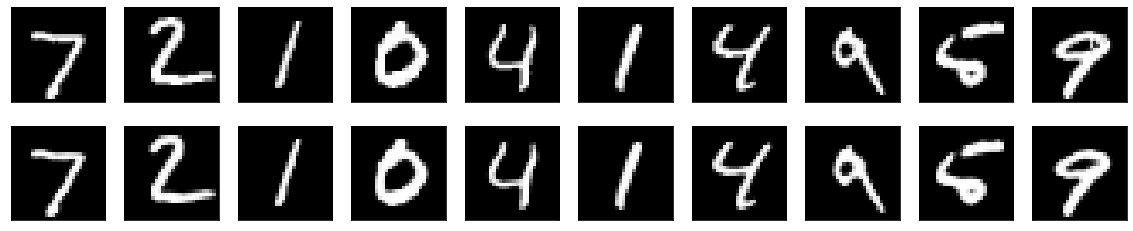

In [0]:
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()